In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_raw = pd.read_csv('train_data.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [3]:
print('Is there any missing value? \n ', data.isnull().values.any())
print('How many missing values? \n ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values? \n ', len(data))

Is there any missing value? 
  True
How many missing values? 
  89227
Number of participants after eliminating missing values? 
  1013481


In [4]:
#Extroversion Questionnaires
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

#Neurotism Questionnaires
est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

#Agreeableness Questionnaires
agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

#Conscientiousness Questionnaires
csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

#Open_to_Experience Questionnaires
opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}


In [5]:
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

print("The columns start with 'EXT':",EXT)
print("The columns start with 'EST':",EST)
print("The columns start with 'AGR':",AGR)
print("The columns start with 'CSN':",CSN)
print("The columns start with 'OPN':",OPN)


The columns start with 'EXT': ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']
The columns start with 'EST': ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']
The columns start with 'AGR': ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']
The columns start with 'CSN': ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']
The columns start with 'OPN': ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']


In [6]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]],bins=14, color= color,alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

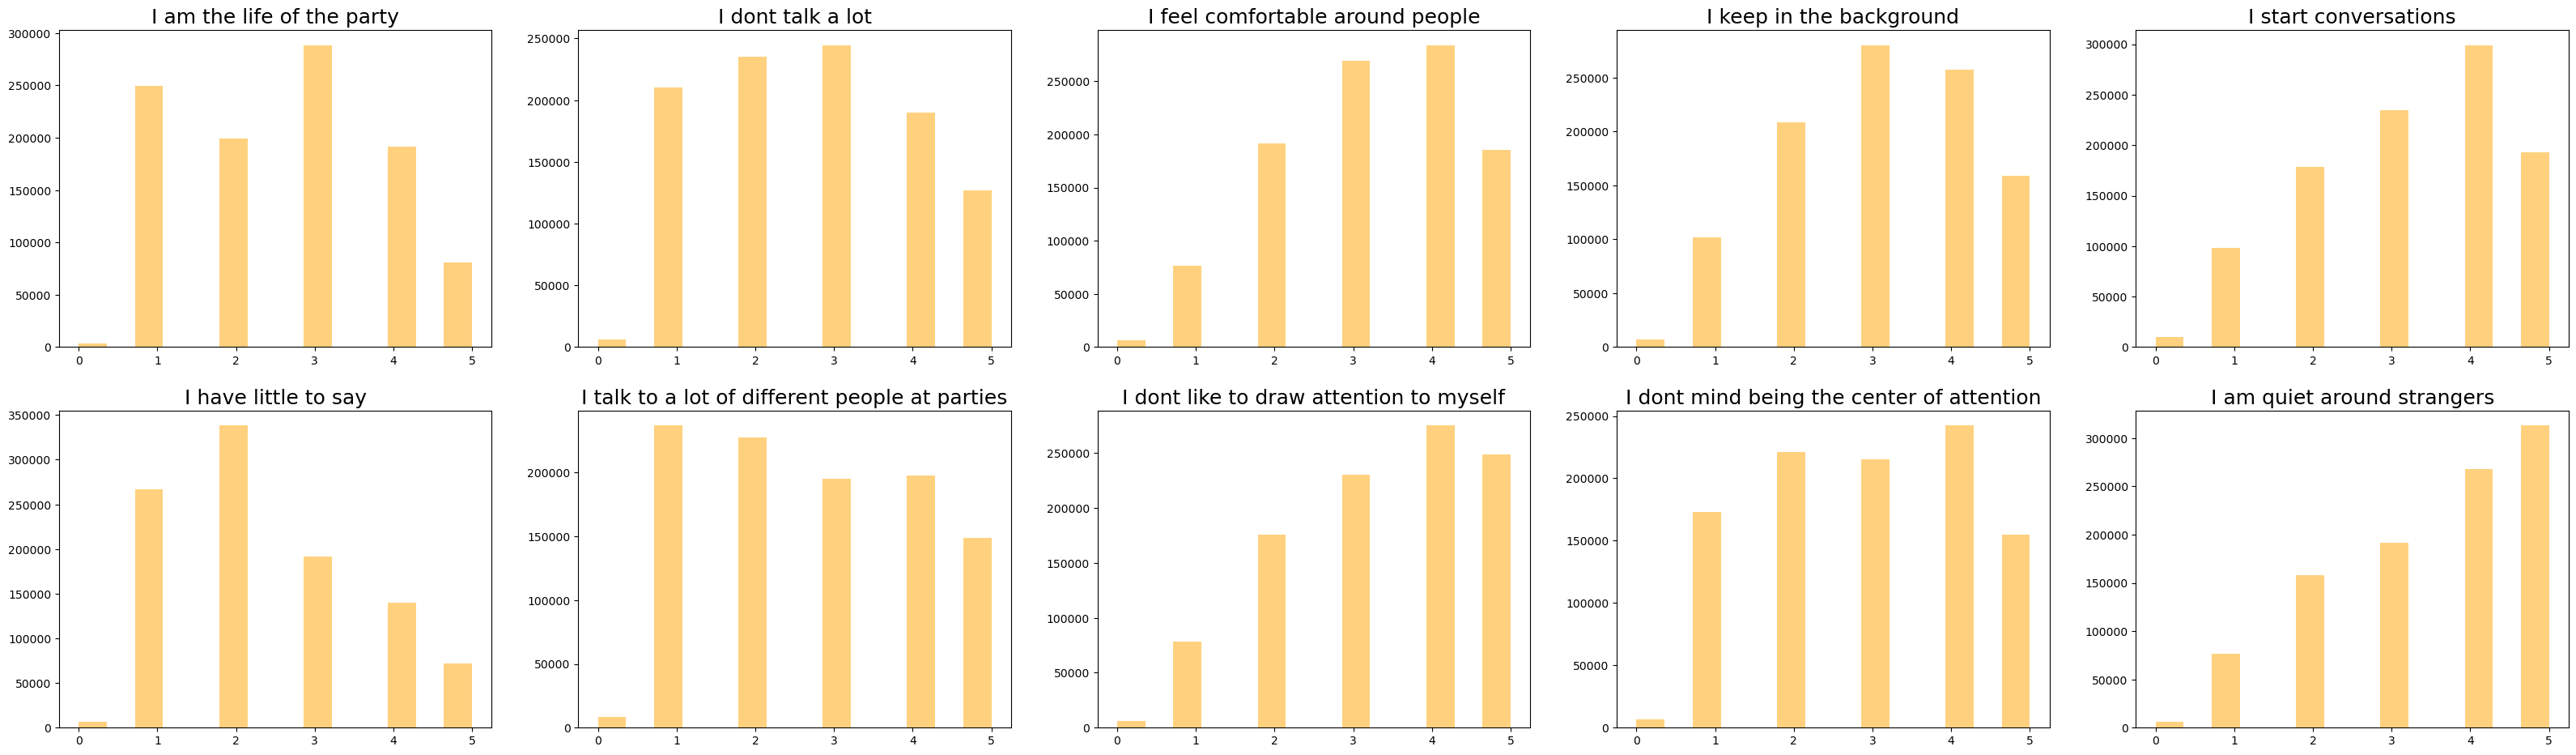

In [7]:
vis_questions(EXT, ext_questions, 'orange')


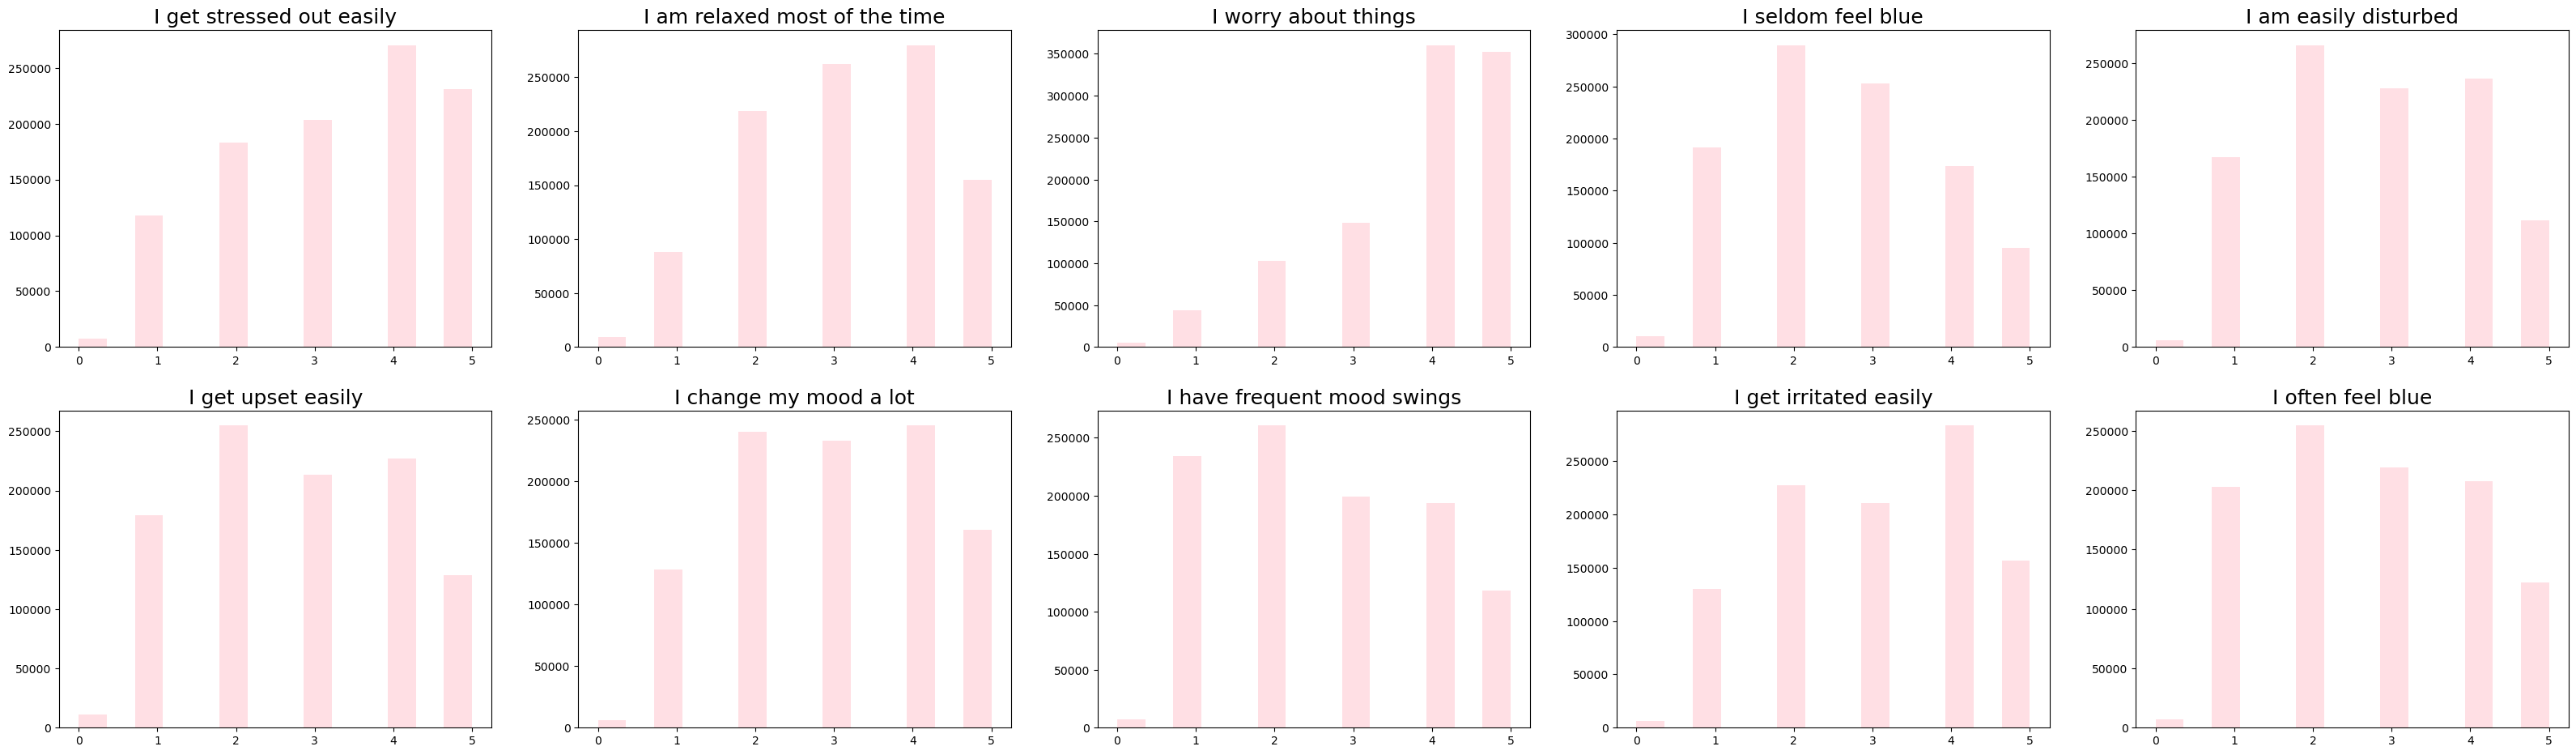

In [8]:
vis_questions(EST, est_questions, 'pink')


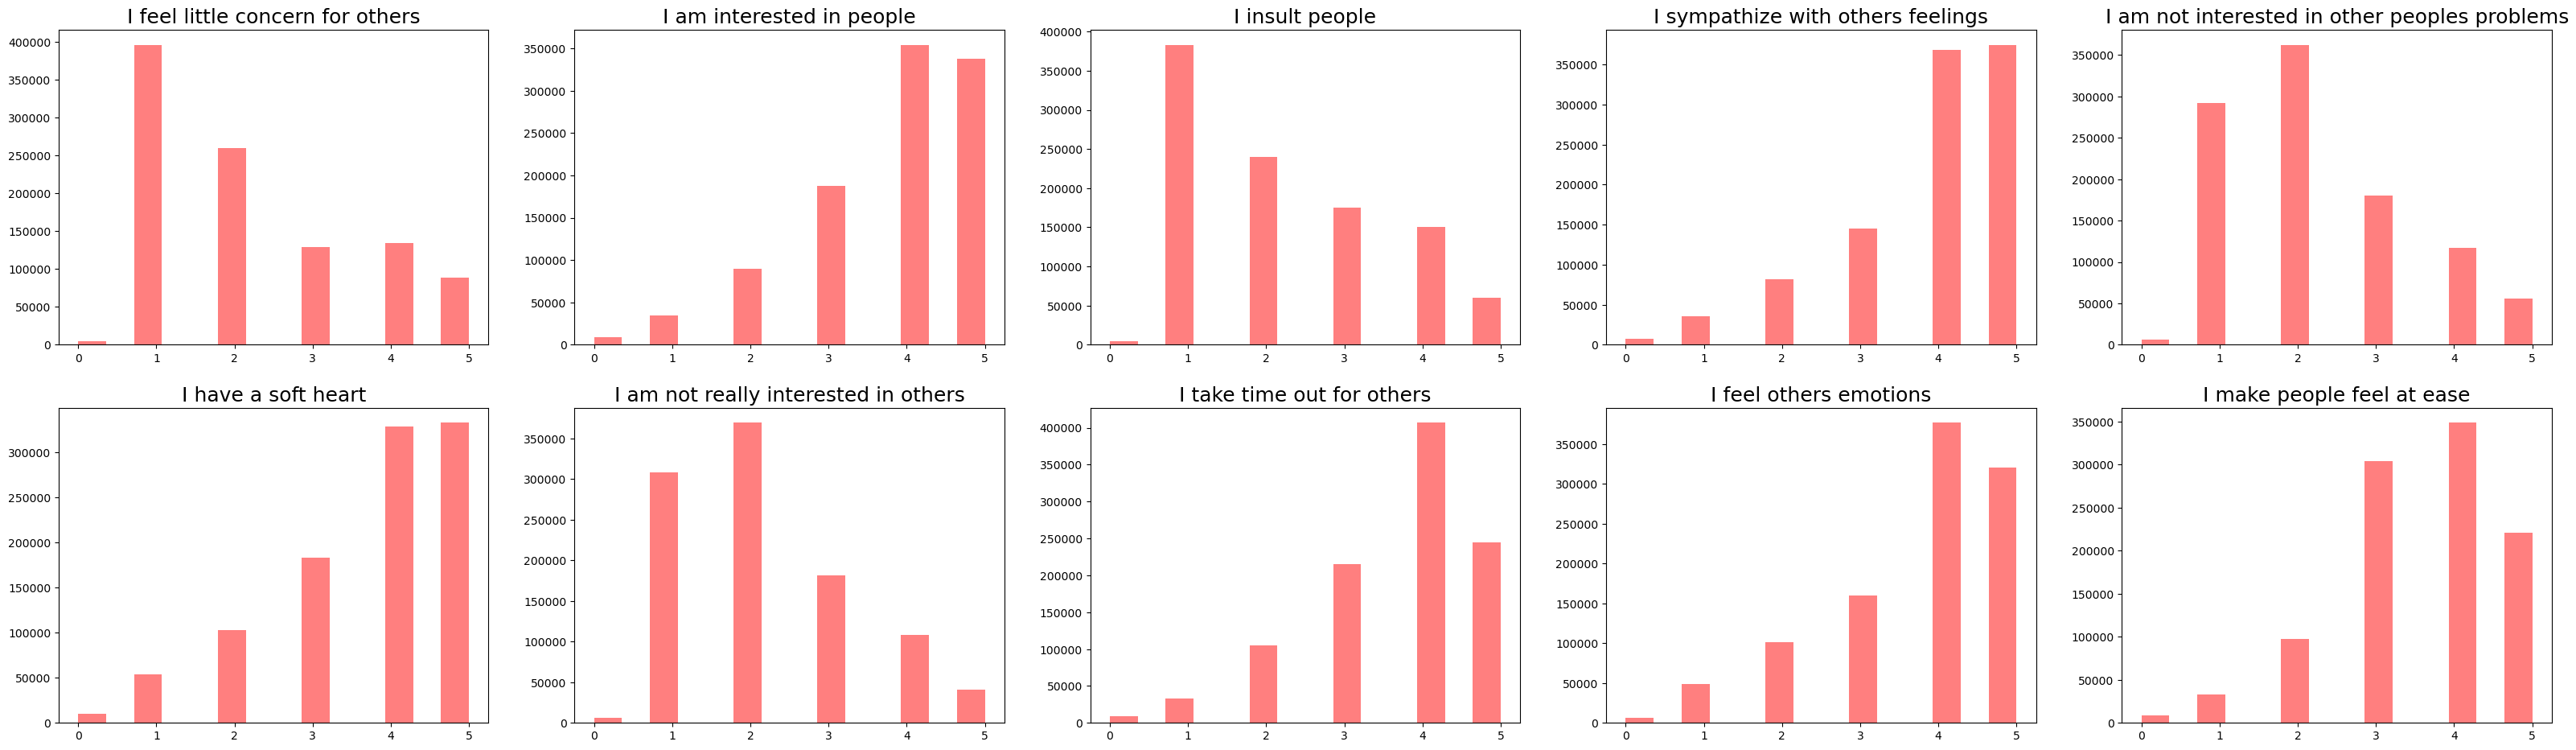

In [9]:
vis_questions(AGR, agr_questions, 'red')


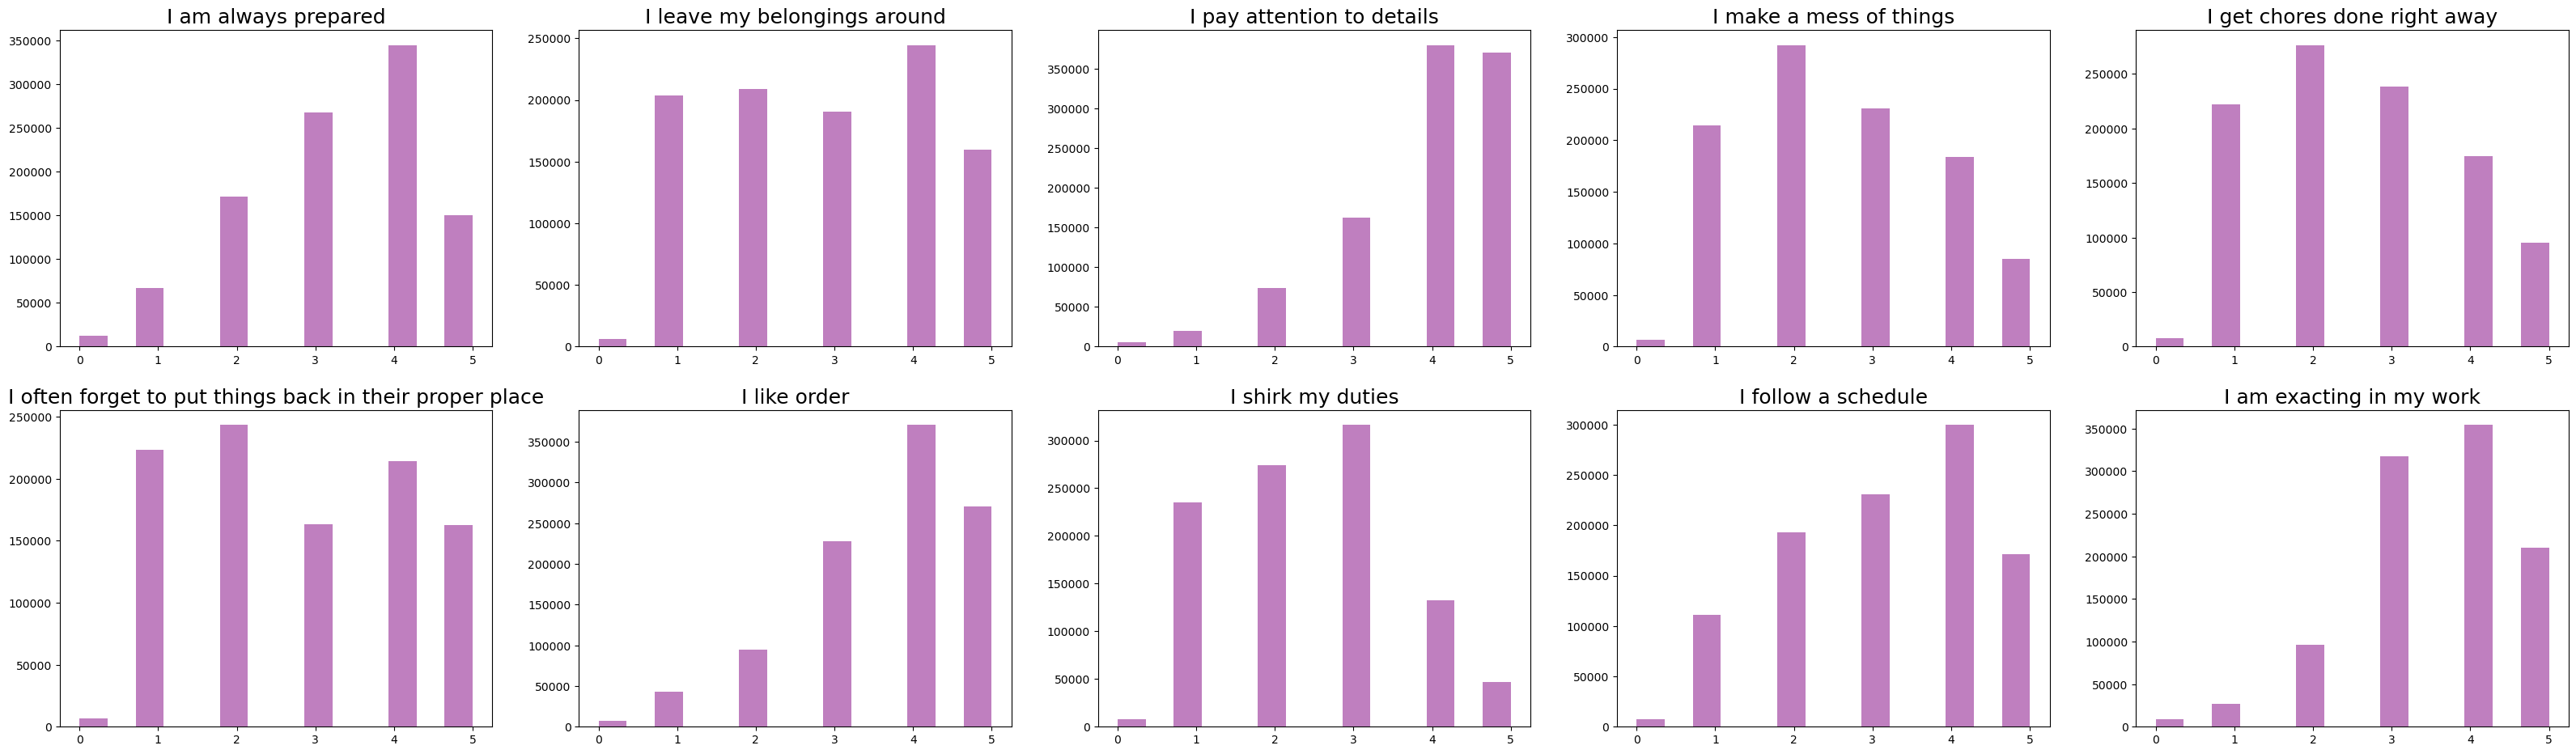

In [10]:
vis_questions(CSN, csn_questions, 'purple')


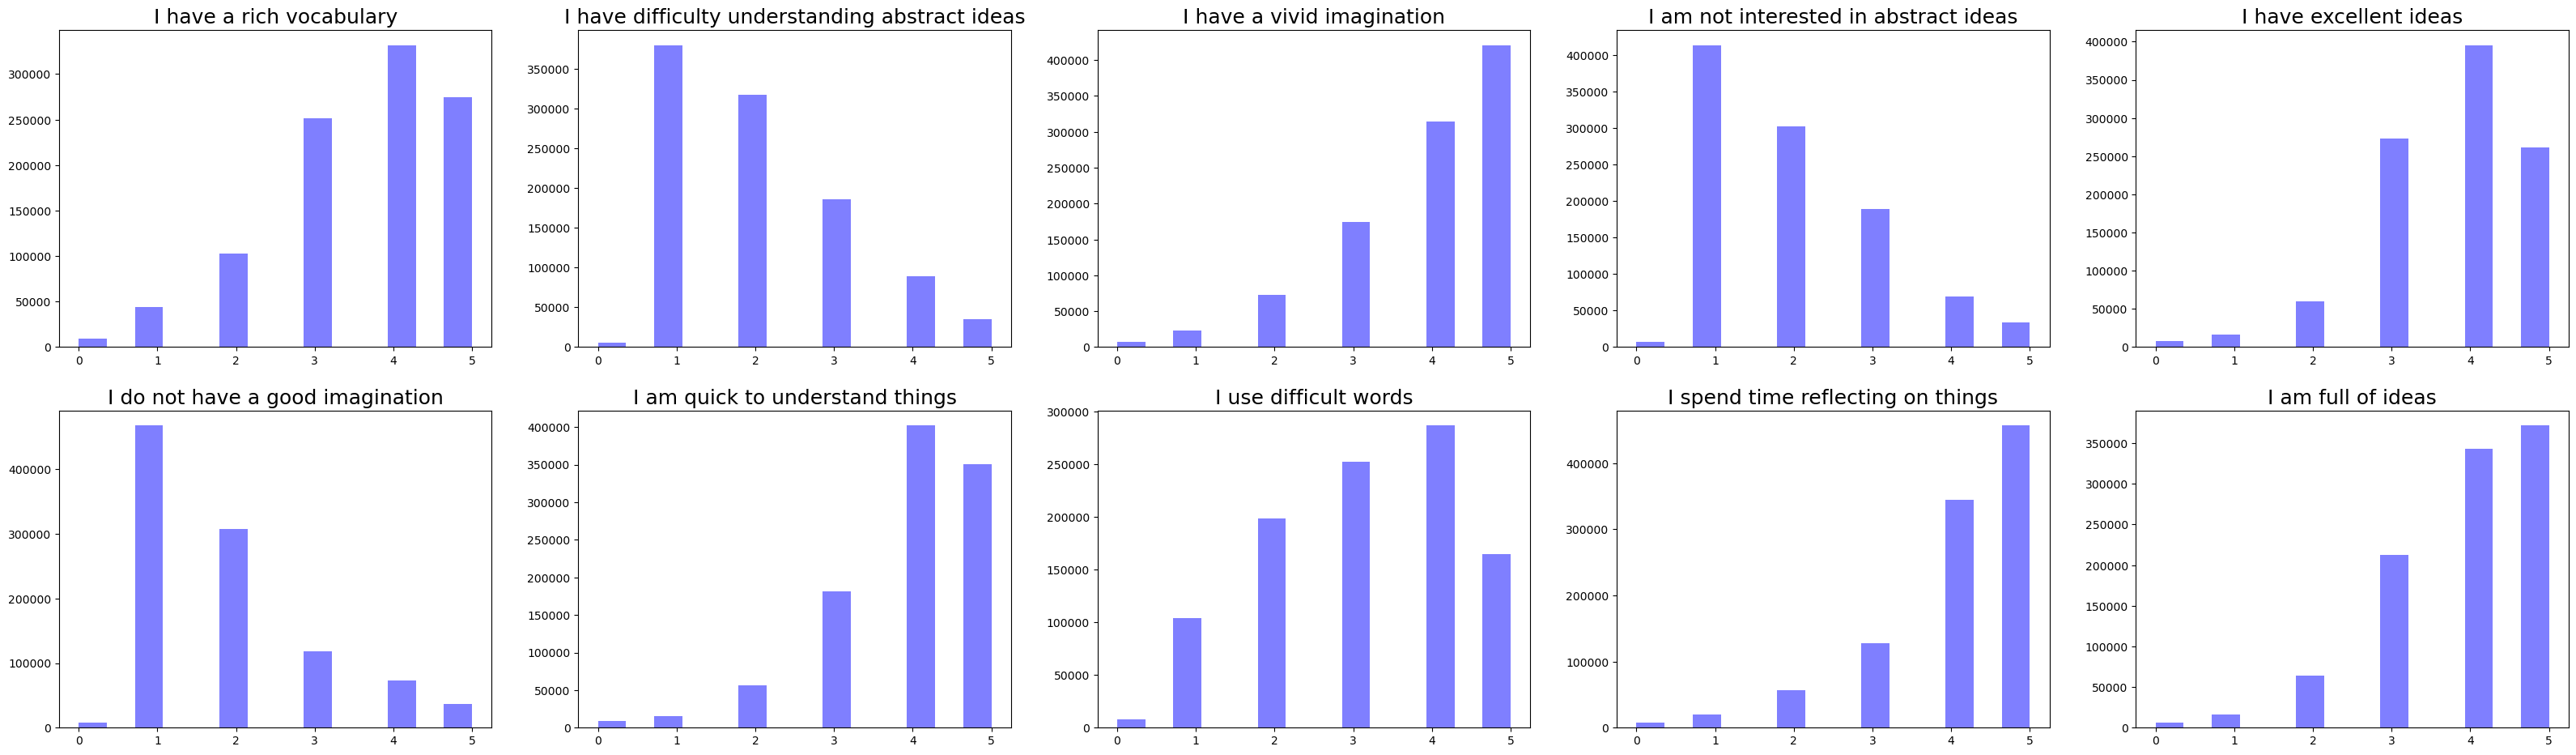

In [11]:
vis_questions(OPN, opn_questions, 'blue')


In [12]:
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]
df_sample

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,1.0,0.4,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.8,0.8,0.4,0.8,0.8,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,0.4,0.6,0.8,0.2,0.6,0.2,0.4,0.2,0.6,0.2,0.2,0.8,0.2,1.0,0.2,1.0,0.6,0.8,1.0,0.6,0.6,0.4,1.0,0.6,0.6,0.2,0.6,0.6,1.0,0.6,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,0.6,0.2,0.8,0.2,0.8,0.4,0.8,0.2,0.8,0.8,0.6,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.4,0.8,0.4,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,0.6,0.6,0.6,0.4,0.6,0.4,0.4,0.4,0.8,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.2,0.4,0.4,0.6,0.2,0.8,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,0.2,1.0,1.0,0.6,0.2,0.2,0.2,0.2,0.6,0.4,0.2,1.0,0.2,1.0,0.2,0.6,0.2,1.0,1.0,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.2,1.0,1.0,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.2,1.0,0.6,1.0,0.6,0.8,0.2,1.0,0.2,1.0,0.4,0.8,1.0,0.4,0.4,0.6,1.0,0.6,0.8,0.4,0.2,0.8,0.2,1.0,0.4,1.0,0.6,1.0,0.8,0.8,0.6,0.4,0.8,0.8,0.2,1.0,0.8,0.4,1.0,0.8,0.4,0.2,1.0,0.2,0.6,0.4,0.6,0.4,0.8,0.6
4996,0.2,1.0,0.6,0.6,0.6,0.6,0.6,0.8,0.4,0.8,0.4,0.8,0.8,0.8,0.6,0.6,0.6,0.6,0.6,0.4,0.4,1.0,0.4,1.0,0.4,0.8,0.6,0.8,1.0,0.6,0.6,0.8,0.8,1.0,0.2,0.8,0.8,0.2,0.4,0.8,0.8,0.2,0.4,0.2,0.8,0.8,1.0,0.6,0.8,0.8
4997,0.8,0.2,0.8,0.2,1.0,0.2,0.4,0.4,1.0,0.4,1.0,0.4,1.0,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.8,0.6,0.6,0.2,0.8,0.2,0.6,0.6,0.6,0.8,0.8,0.8,0.4,0.2,0.2,0.8,0.4,1.0,0.8,1.0,0.2,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0
4998,0.2,1.0,0.6,0.6,0.2,0.8,0.2,1.0,1.0,1.0,1.0,0.4,0.8,0.6,1.0,1.0,0.6,0.8,1.0,0.6,0.2,0.8,0.2,1.0,0.6,0.8,0.6,0.6,0.8,1.0,0.6,1.0,0.6,1.0,0.2,1.0,0.8,0.6,0.4,0.4,0.4,0.6,1.0,0.4,0.8,0.4,0.2,0.4,1.0,1.0


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

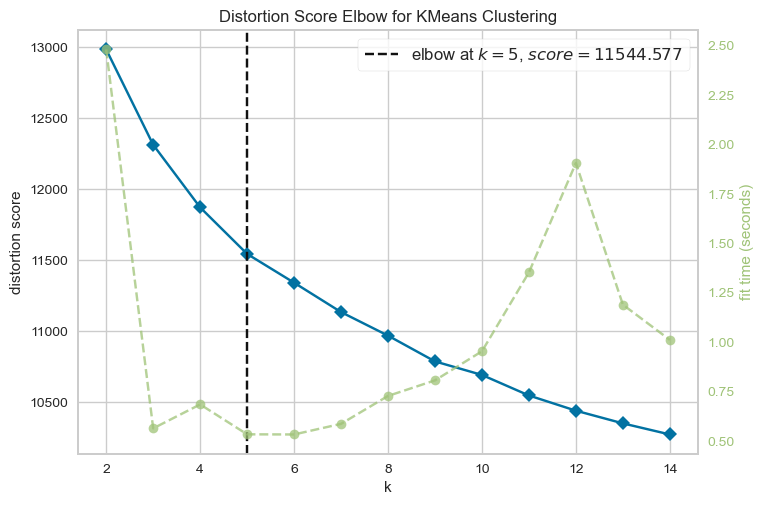

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [14]:
from sklearn.cluster import KMeans

df_model = data.drop('country', axis=1)

kmeans = KMeans(n_clusters=5,random_state=42)
k_fit = kmeans.fit(df_model)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,3
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,1
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,1
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,2
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,3


In [16]:
df_model.Clusters.value_counts()

0    226729
1    212500
3    210395
4    199765
2    164092
Name: Clusters, dtype: int64

In [17]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.445669,1.919662,3.786767,2.512083,4.035915,1.836099,3.646380,2.772473,3.759563,3.008085,3.813200,2.925554,4.244728,2.411782,3.288159,3.469724,3.809089,3.460104,3.658853,3.178023,2.161038,4.270023,2.656475,4.182147,2.003304,3.998209,1.860521,3.895726,4.130041,3.842574,2.955255,3.606226,3.840700,3.239511,2.233861,3.525089,3.458133,2.830264,2.944656,3.478152,3.737696,2.118979,4.247256,1.967309,3.955489,1.772804,3.960671,3.374103,4.189552,4.199348
1,2.120118,3.309096,3.088899,3.667214,2.953449,2.708828,2.200706,4.004424,2.322513,4.137859,3.502640,3.080424,4.153078,2.606918,2.819939,2.787929,2.868019,2.429628,2.972908,2.710593,1.884668,3.935600,1.692019,4.351647,1.988315,4.143600,2.017515,3.981256,4.173468,3.718188,3.834306,2.233191,4.298353,2.022824,3.235431,2.079214,4.164207,2.017459,3.829680,3.891285,3.577732,2.135096,3.896894,2.060400,3.728847,1.964932,4.011280,2.988475,4.267628,3.816682
2,2.195342,3.280087,2.800691,3.397107,2.593569,2.756667,2.126813,3.520208,2.654493,3.780641,2.336129,3.624997,2.983205,2.924012,2.319833,2.008440,2.298491,1.918869,2.576098,2.238110,3.027789,2.933044,2.575622,2.771183,3.149477,2.644498,2.998757,2.850035,2.601224,2.980420,3.141335,2.832466,3.664968,2.408588,2.367861,2.743071,3.373522,2.513383,2.767728,3.337378,3.534877,1.975617,3.613802,2.058041,3.623559,2.041873,3.885132,3.109298,3.694190,3.668009
3,3.473623,1.941486,4.339153,2.217315,4.265695,1.665287,3.887873,2.808275,3.743863,2.513334,2.327303,3.818308,3.159177,3.280401,2.117422,1.903348,2.113933,1.679484,2.119528,1.720606,1.891846,4.432905,1.830509,4.249089,1.855096,3.849298,1.586592,4.098700,4.102293,4.195347,3.716581,2.579115,4.192115,1.897673,3.140289,2.280149,3.871142,1.935421,3.582485,3.875211,3.884113,1.755465,4.082559,1.795542,4.157722,1.654863,4.313572,3.234160,4.096295,4.295045
4,1.806963,3.630976,2.228824,4.055300,2.279789,3.197822,1.740790,4.068801,2.175076,4.474853,4.247015,2.461157,4.501204,2.146978,3.556634,3.855996,3.987220,3.757515,4.005441,3.929908,2.504893,3.325763,2.607048,3.798483,2.591145,3.817936,2.747944,3.403184,3.639281,3.041999,2.804320,3.354882,3.810868,3.475759,2.092338,3.499482,3.559412,3.045989,2.775862,3.306545,3.498801,2.384101,4.059615,2.139994,3.431297,2.089655,3.676875,3.176878,4.273877,3.719841


In [18]:
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.072270,3.425922,3.300006,3.211185,3.352321
1,3.051311,2.993208,3.188628,3.160595,3.244797
2,2.910562,2.522818,2.853205,2.915030,3.120440
3,3.085590,2.423951,3.209168,3.107018,3.326934
4,2.965919,3.644907,3.147768,3.172546,3.245093


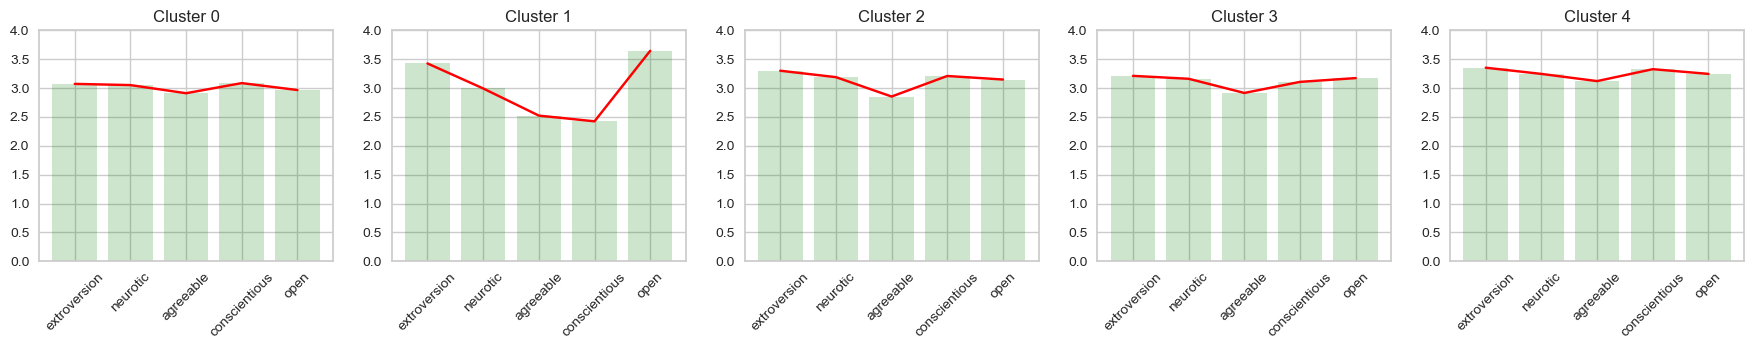

In [19]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca

,PCA1,PCA2,Clusters
0,-5.338785,-1.028894,3
1,0.245293,2.836919,1
2,-0.652143,2.003383,1
3,1.142889,0.225266,2
4,-4.475485,2.830429,3
...,...,...,...
1013476,-0.506262,-1.653471,0
1013477,1.700836,-4.049643,0
1013478,-1.799754,-3.539589,0
1013479,2.223270,0.844149,1


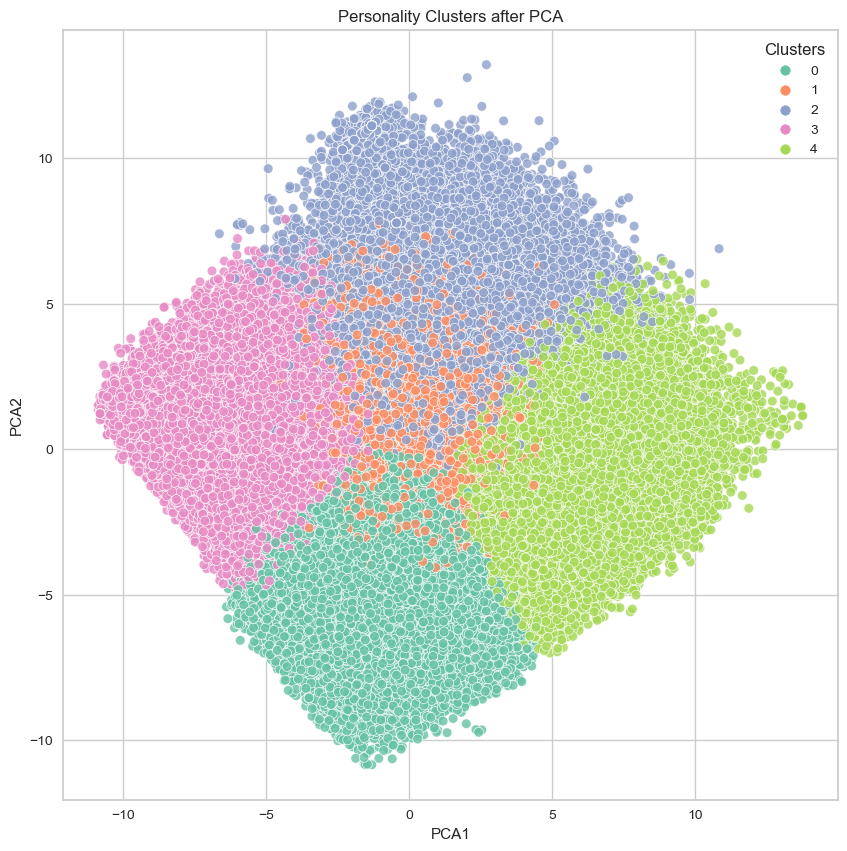

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [22]:
import joblib

#save the model
filename='finalized_model.sav'
joblib.dump(k_fit,filename)

['finalized_model.sav']

In [23]:
my_data = pd.read_excel('test_data.xlsx')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [24]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [1]


In [25]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality

my_sums

,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.2,2.4,3.4,3.3,3.4,1


C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


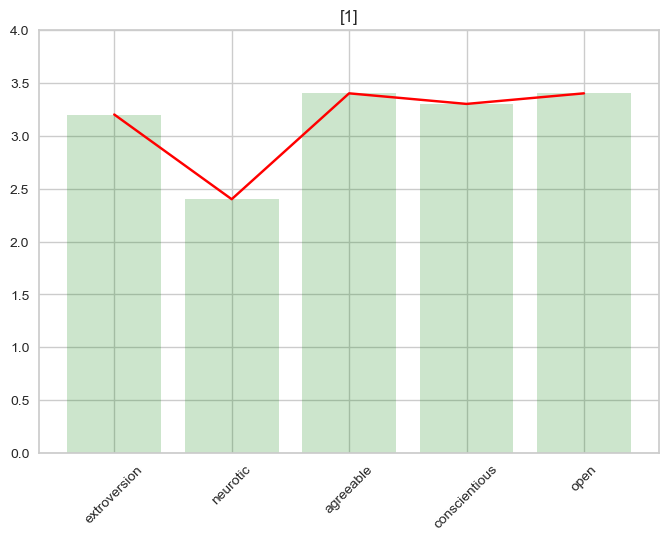

In [26]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title(my_personality)
plt.xticks(rotation=45)
plt.ylim(0,4);

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you already have df_model and k_fit
df_model = data.drop('country', axis=1)
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

# Get cluster labels for your data
labels = k_fit.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(df_model, labels)
print("Silhouette Score:", silhouette_avg)